✅ Visuals saved in 'results/' folder using inbuilt dataset.


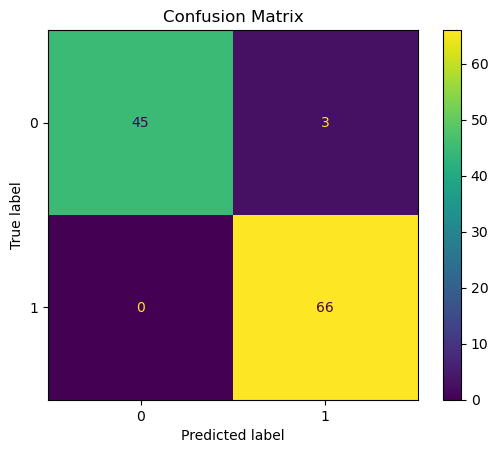

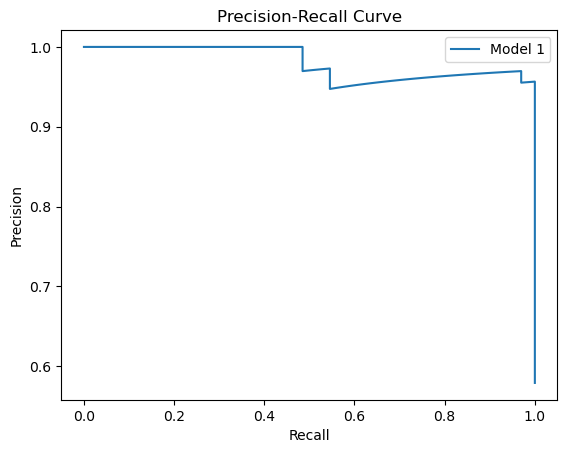

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
import os

# Load inbuilt dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train logistic regression models
model1 = LogisticRegression(max_iter=5000).fit(X_train, y_train)
model2 = LogisticRegression(max_iter=5000).fit(X_train[["mean radius"]], y_train)  # weaker model

# Predictions
y_pred1 = model1.predict(X_test)
y_score1 = model1.predict_proba(X_test)[:, 1]

# Save results folder
os.makedirs("results", exist_ok=True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.savefig("results/confusion_matrix.png")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score1)
plt.figure()
plt.plot(recall, precision, label="Model 1")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.savefig("results/precision_recall.png")

print("✅ Visuals saved in 'results/' folder using inbuilt dataset.")
